In [1]:
import pandas as pd
import sqlite3

df = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')
df.head()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,2,BK-R50B-58,...,THOMAS,11/11/1958,M,M,john48@adventure-works.com,80000.0,1.0,Partial College,Skilled Manual,N
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,2,BK-R93R-48,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,80000.0,3.0,Partial College,Professional,N
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,1,BK-M82B-44,...,SANZ,4/21/1974,M,M,ross38@adventure-works.com,100000.0,0.0,High School,Management,Y
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,2,BK-R50B-44,...,LEWIS,9/25/1980,S,M,seth20@adventure-works.com,30000.0,0.0,High School,Skilled Manual,N
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,2,BK-R93R-48,...,CHEN,1/11/1965,S,M,alejandro4@adventure-works.com,20000.0,2.0,High School,Manual,Y


In [2]:
df.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity',
       'ProductSubcategoryKey', 'ProductSKU', 'ProductName', 'ModelName',
       'ProductDescription', 'ProductColor', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'SubcategoryName', 'ProductCategoryKey',
       'Region', 'Country', 'Continent', 'CategoryName', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner'],
      dtype='object')

In [3]:
df.dtypes

OrderDate                 object
StockDate                 object
OrderNumber               object
ProductKey                 int64
CustomerKey                int64
TerritoryKey               int64
OrderLineItem              int64
OrderQuantity              int64
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductColor              object
ProductSize               object
ProductStyle              object
ProductCost              float64
ProductPrice             float64
SubcategoryName           object
ProductCategoryKey         int64
Region                    object
Country                   object
Continent                 object
CategoryName              object
FirstName                 object
LastName                  object
BirthDate                 object
MaritalStatus             object
Gender                    object
EmailAddress              object
AnnualInco

In [4]:
df.describe()

,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductCost,ProductPrice,ProductCategoryKey,AnnualIncome,TotalChildren
count,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56046.000000,56030.000000,56030.000000
mean,438.962103,18843.645559,6.254666,1.903151,1.501873,23.412982,255.750403,438.969347,3.102576,59766.018205,1.843762
std,118.612352,5412.449843,2.958005,1.021006,0.612379,13.493235,496.192920,838.650049,1.258273,33075.213900,1.619349
min,214.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,0.856500,2.290000,1.000000,10000.000000,0.000000
25%,360.000000,14016.000000,4.000000,1.000000,1.000000,19.000000,2.973300,7.950000,3.000000,30000.000000,0.000000
50%,479.000000,18157.000000,7.000000,2.000000,1.000000,28.000000,11.216300,29.990000,4.000000,60000.000000,2.000000
75%,529.000000,23425.750000,9.000000,2.000000,2.000000,37.000000,59.466000,159.000000,4.000000,80000.000000,3.000000
max,606.000000,29483.000000,10.000000,8.000000,3.000000,37.000000,2171.294200,3578.270000,4.000000,170000.000000,5.000000


In [5]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query
query = '''
    SELECT ProductSKU, OrderDate, SUM(ProductPrice) AS total_revenue
    FROM df_table
    GROUP BY ProductSKU, OrderDate
    ORDER BY OrderDate, total_revenue DESC
'''

# Execute the query using pandas
df_result = pd.read_sql_query(query, conn)

# Get top 5 account names by revenue per quarter
top_accounts = df_result.groupby('OrderDate').head(5)

# Display the top 5 account names by revenue per quarter
print(top_accounts)

# Close the connection
conn.close()


       ProductSKU OrderDate  total_revenue
0      BK-R93R-48  1/1/2015      3578.2700
1      BK-M82B-44  1/1/2015      3374.9900
2      BK-R50B-44  1/1/2015       699.0982
3      BK-R50B-58  1/1/2015       699.0982
4      BK-R89B-48  1/1/2016      4363.1250
...           ...       ...            ...
21924  BK-M68S-38  9/9/2016      4142.8392
21925  BK-M68S-46  9/9/2016      4142.8392
21926  BK-M68B-42  9/9/2016      4098.1964
21927  BK-M68B-46  9/9/2016      4098.1964
21928  BK-T79U-50  9/9/2016      2384.0700

[4323 rows x 3 columns]


In [6]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each quarter
query = '''
    SELECT ProductSKU, OrderDate, SUM(ProductPrice) AS total_revenue
    FROM df_table
    GROUP BY ProductSKU, OrderDate
    ORDER BY OrderDate, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_quarter = df_result.groupby('OrderDate').apply(lambda x: x.nlargest(5, 'total_revenue')).reset_index(drop=True)

# Display the top 5 accounts by revenue for each quarter
print(top_accounts_by_quarter)

# Close the connection
conn.close()


      ProductSKU OrderDate  total_revenue
0     BK-R93R-48  1/1/2015      3578.2700
1     BK-M82B-44  1/1/2015      3374.9900
2     BK-R50B-44  1/1/2015       699.0982
3     BK-R50B-58  1/1/2015       699.0982
4     BK-R89B-48  1/1/2016      4363.1250
...          ...       ...            ...
4318  BK-M68S-38  9/9/2016      4142.8392
4319  BK-M68S-46  9/9/2016      4142.8392
4320  BK-M68B-42  9/9/2016      4098.1964
4321  BK-M68B-46  9/9/2016      4098.1964
4322  BK-T79U-50  9/9/2016      2384.0700

[4323 rows x 3 columns]


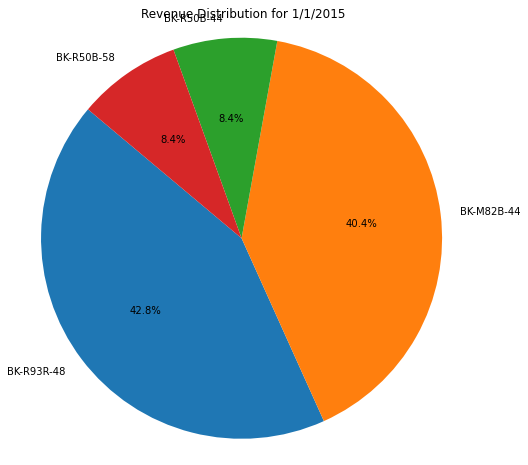

In [7]:
import matplotlib.pyplot as plt

# top five accounts per quarter by revenue
# pie charts sometimes reveal more by pie slices than looking at bar chart columns
quarter_to_plot = '1/1/2015'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['OrderDate'].str.startswith(quarter_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(quarter_data['total_revenue'], labels=quarter_data['ProductSKU'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {quarter_to_plot}')
plt.axis('equal')
plt.show()


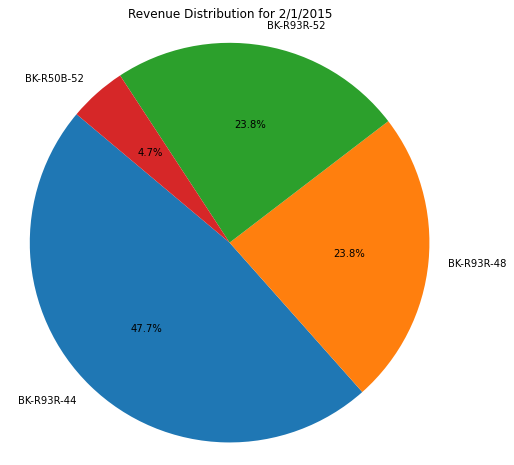

In [8]:
import matplotlib.pyplot as plt

# top five accounts per quarter by revenue
# pie charts sometimes reveal more by pie slices than looking at bar chart columns
quarter_to_plot = '2/1/2015'  # choose the quarter

# Filter data for the selected quarter
quarter_data = top_accounts_by_quarter[top_accounts_by_quarter['OrderDate'].str.startswith(quarter_to_plot)]

# Plotting a pie chart for the selected quarter
plt.figure(figsize=(8, 8))
plt.pie(quarter_data['total_revenue'], labels=quarter_data['ProductSKU'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue Distribution for {quarter_to_plot}')
plt.axis('equal')
plt.show()


In [9]:
import pandas as pd

# Assuming 'date' is the column name in your DataFrame
# Example DataFrame with your 'date' column
date_range = pd.date_range(start='2015-01-01', end='2017-12-31')

# Create DataFrame with 'OrderDate' column containing the date range
df = pd.DataFrame({'OrderDate': date_range})

# Display the DataFrame
print(df)

      OrderDate
0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
...         ...
1091 2017-12-27
1092 2017-12-28
1093 2017-12-29
1094 2017-12-30
1095 2017-12-31

[1096 rows x 1 columns]


In [10]:
# Convert 'date' column to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%Y')

# Extract quarter and month
df['quarter'] = df['OrderDate'].dt.to_period('Q')
df['month'] = df['OrderDate'].dt.strftime('%b')

# Display the updated DataFrame
print(df)

      OrderDate quarter month
0    2015-01-01  2015Q1   Jan
1    2015-01-02  2015Q1   Jan
2    2015-01-03  2015Q1   Jan
3    2015-01-04  2015Q1   Jan
4    2015-01-05  2015Q1   Jan
...         ...     ...   ...
1091 2017-12-27  2017Q4   Dec
1092 2017-12-28  2017Q4   Dec
1093 2017-12-29  2017Q4   Dec
1094 2017-12-30  2017Q4   Dec
1095 2017-12-31  2017Q4   Dec

[1096 rows x 3 columns]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each quarter
query = '''
    SELECT ProductSKU, OrderDate, SUM(OrderQuantity * ProductPrice) AS total_revenue
    FROM df_table
    GROUP BY ProductSKU, OrderDate
    ORDER BY OrderDate, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_quarter = df_result.groupby('OrderDate').apply(lambda x: x.nlargest(5, 'total_revenue')).reset_index(drop=True)

print(top_accounts_by_quarter)


      ProductSKU OrderDate  total_revenue
0     BK-R93R-48  1/1/2015      3578.2700
1     BK-M82B-44  1/1/2015      3374.9900
2     BK-R50B-44  1/1/2015       699.0982
3     BK-R50B-58  1/1/2015       699.0982
4     BK-R89B-48  1/1/2016      4363.1250
...          ...       ...            ...
4318  BK-M68S-38  9/9/2016      4142.8392
4319  BK-M68S-46  9/9/2016      4142.8392
4320  BK-M68B-42  9/9/2016      4098.1964
4321  BK-M68B-46  9/9/2016      4098.1964
4322  BK-T79U-50  9/9/2016      2384.0700

[4323 rows x 3 columns]


In [12]:
# Get top 5 accounts by revenue for each quarter
top_accounts_by_month = df_result.groupby('OrderDate').apply(lambda x: x.nlargest(5, 'total_revenue')).reset_index(drop=True)

print(top_accounts_by_month)


      ProductSKU OrderDate  total_revenue
0     BK-R93R-48  1/1/2015      3578.2700
1     BK-M82B-44  1/1/2015      3374.9900
2     BK-R50B-44  1/1/2015       699.0982
3     BK-R50B-58  1/1/2015       699.0982
4     BK-R89B-48  1/1/2016      4363.1250
...          ...       ...            ...
4318  BK-M68S-38  9/9/2016      4142.8392
4319  BK-M68S-46  9/9/2016      4142.8392
4320  BK-M68B-42  9/9/2016      4098.1964
4321  BK-M68B-46  9/9/2016      4098.1964
4322  BK-T79U-50  9/9/2016      2384.0700

[4323 rows x 3 columns]


In [13]:
import pandas as pd

# Step 1: Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Step 2: Add a quarter column
df['Quarter'] = df['OrderDate'].dt.to_period('Q')

# Step 3: Add a month column
df['Month'] = df['OrderDate'].dt.to_period('M')

# Step 4: Add a day of the week column
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

# Display the updated DataFrame
print(df.head())


   OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0 2015-01-01   9/21/2001     SO45080         332        14657             1   
1 2015-01-01   12/5/2001     SO45079         312        29255             4   
2 2015-01-01  10/29/2001     SO45082         350        11455             9   
3 2015-01-01  11/16/2001     SO45081         338        26782             6   
4 2015-01-02  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity  ProductSubcategoryKey  ProductSKU  ...  \
0              1              1                      2  BK-R50B-58  ...   
1              1              1                      2  BK-R93R-48  ...   
2              1              1                      1  BK-M82B-44  ...   
3              1              1                      2  BK-R50B-44  ...   
4              1              1                      2  BK-R93R-48  ...   

  Gender                    EmailAddress AnnualIncome TotalChildren  \
0  

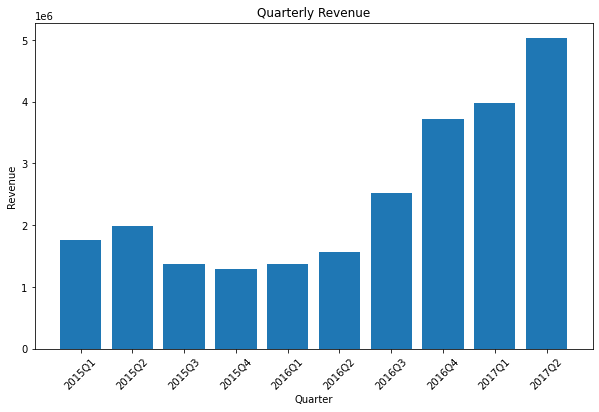

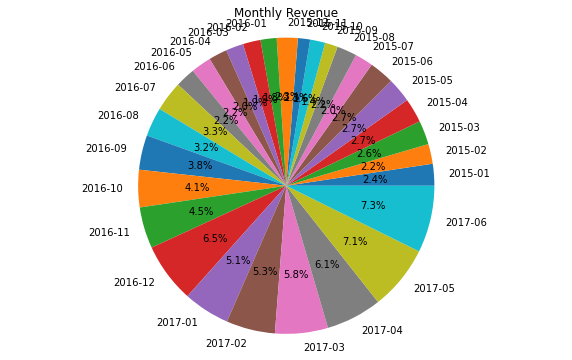

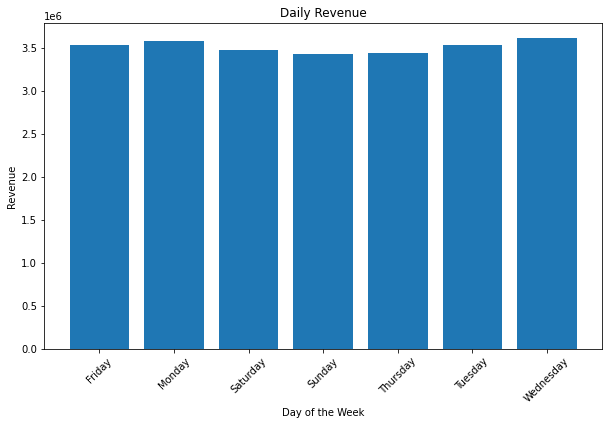

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename 'ProductPrice' column to 'Revenue'
df.rename(columns={'ProductPrice': 'Revenue'}, inplace=True)

# Assuming 'Revenue' column now exists in your DataFrame

# Group by quarter and calculate revenue
quarterly_revenue = df.groupby('Quarter')['Revenue'].sum().reset_index()

# Group by month and calculate revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

# Group by day of the week and calculate revenue
daily_revenue = df.groupby('DayOfWeek')['Revenue'].sum().reset_index()

# Create DataFrame for each grouping
quarterly_df = pd.DataFrame(quarterly_revenue)
monthly_df = pd.DataFrame(monthly_revenue)
daily_df = pd.DataFrame(daily_revenue)

# Plot bar chart for quarterly revenue
plt.figure(figsize=(10, 6))
plt.bar(quarterly_df['Quarter'].astype(str), quarterly_df['Revenue'])
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Quarterly Revenue')
plt.xticks(rotation=45)
plt.show()

# Plot pie chart for monthly revenue
plt.figure(figsize=(10, 6))
plt.pie(monthly_df['Revenue'], labels=monthly_df['Month'].astype(str), autopct='%1.1f%%')
plt.title('Monthly Revenue')
plt.axis('equal')
plt.show()

# Plot bar chart for daily revenue
plt.figure(figsize=(10, 6))
plt.bar(daily_df['DayOfWeek'], daily_df['Revenue'])
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.xticks(rotation=45)
plt.show()


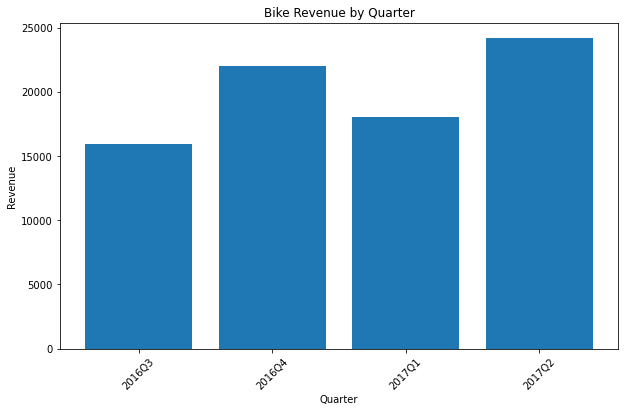

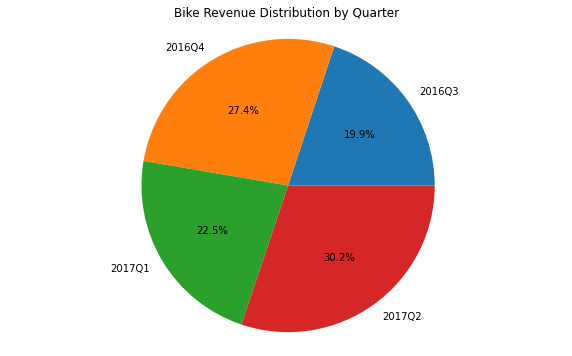

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename 'ProductPrice' column to 'Revenue'
df.rename(columns={'ProductPrice': 'Revenue'}, inplace=True)

# Filter DataFrame for bike products
bike_df = df[df['ProductName'].str.contains('Bike', case=False)]

# Group by quarter and calculate revenue for bikes
bike_quarterly_revenue = bike_df.groupby('Quarter')['Revenue'].sum().reset_index()

# Create DataFrame for quarterly bike revenue
bike_quarterly_df = pd.DataFrame(bike_quarterly_revenue)

# Plot bar chart for quarterly bike revenue
plt.figure(figsize=(10, 6))
plt.bar(bike_quarterly_df['Quarter'].astype(str), bike_quarterly_df['Revenue'])
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Bike Revenue by Quarter')
plt.xticks(rotation=45)
plt.show()

# Plot pie chart for quarterly bike revenue
plt.figure(figsize=(10, 6))
plt.pie(bike_quarterly_df['Revenue'], labels=bike_quarterly_df['Quarter'].astype(str), autopct='%1.1f%%')
plt.title('Bike Revenue Distribution by Quarter')
plt.axis('equal')
plt.show()


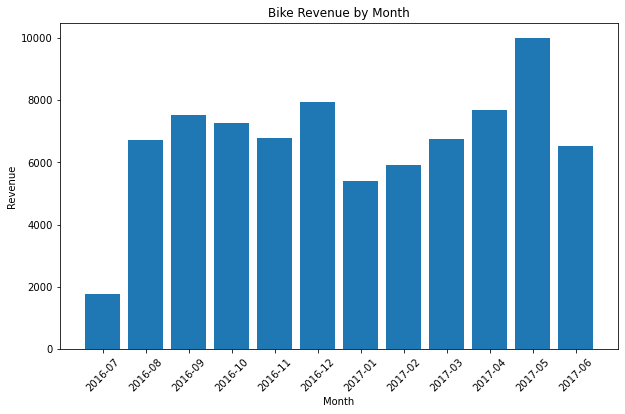

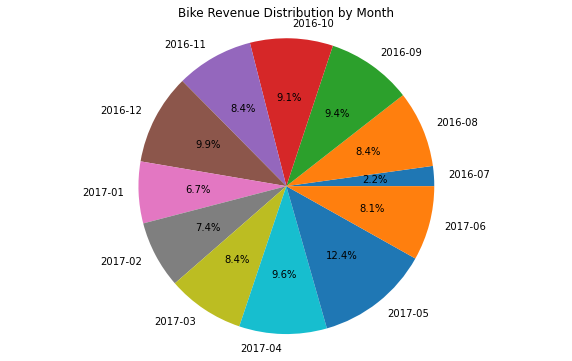

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename 'ProductPrice' column to 'Revenue'
df.rename(columns={'ProductPrice': 'Revenue'}, inplace=True)

# Filter DataFrame for bike products
bike_df = df[df['ProductName'].str.contains('Bike', case=False)]

# Group by quarter and calculate revenue for bikes
bike_monthly_revenue = bike_df.groupby('Month')['Revenue'].sum().reset_index()

# Create DataFrame for monthly bike revenue
bike_monthly_df = pd.DataFrame(bike_monthly_revenue)

# Plot bar chart for quarterly bike revenue
plt.figure(figsize=(10, 6))
plt.bar(bike_monthly_df['Month'].astype(str), bike_monthly_df['Revenue'])
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Bike Revenue by Month')
plt.xticks(rotation=45)
plt.show()

# Plot pie chart for monthly bike revenue
plt.figure(figsize=(10, 6))
plt.pie(bike_monthly_df['Revenue'], labels=bike_monthly_df['Month'].astype(str), autopct='%1.1f%%')
plt.title('Bike Revenue Distribution by Month')
plt.axis('equal')
plt.show()


<Figure size 720x360 with 0 Axes>

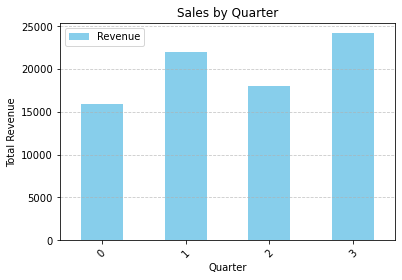

<Figure size 720x360 with 0 Axes>

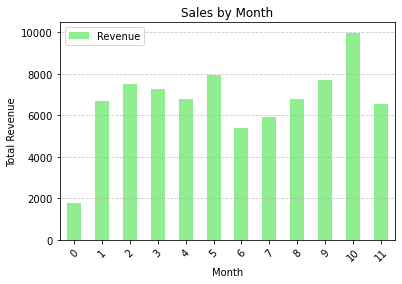

In [17]:
# Plotting sales by quarter
plt.figure(figsize=(10, 5))
bike_quarterly_revenue.plot(kind='bar', color='skyblue')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting sales by month
plt.figure(figsize=(10, 5))
bike_monthly_revenue.plot(kind='bar', color='lightgreen')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each quarter
query = '''
    SELECT ProductSKU, OrderDate, SUM(OrderQuantity * ProductPrice) AS total_revenue
    FROM df_table
    GROUP BY ProductSKU, OrderDate
    ORDER BY OrderDate, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)


In [19]:
# Convert 'OrderDate' column to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%m/%d/%Y')

# Extract quarter and month
df['quarter'] = df['OrderDate'].dt.to_period('Q')
df['month'] = df['OrderDate'].dt.strftime('%b')

# Display the updated DataFrame
print(df)

# Convert 'OrderDate' column to datetime in top_accounts_by_quarter (assuming it's not already converted)
top_accounts_by_quarter['OrderDate'] = pd.to_datetime(top_accounts_by_quarter['OrderDate'])

# Extract quarter
top_accounts_by_quarter['quarter'] = top_accounts_by_quarter['OrderDate'].dt.to_period('Q')

# Group by quarter and sum total revenue
sales_by_quarter = top_accounts_by_quarter.groupby('quarter')['total_revenue'].sum()

print(sales_by_quarter)

       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0     2015-01-01   9/21/2001     SO45080         332        14657   
1     2015-01-01   12/5/2001     SO45079         312        29255   
2     2015-01-01  10/29/2001     SO45082         350        11455   
3     2015-01-01  11/16/2001     SO45081         338        26782   
4     2015-01-02  12/15/2001     SO45083         312        14947   
...          ...         ...         ...         ...          ...   
56041 2017-06-30   3/22/2004     SO74143         477        28517   
56042 2017-06-30   3/15/2004     SO74143         479        28517   
56043 2017-06-30    4/8/2004     SO74143         606        28517   
56044 2017-06-30   5/15/2004     SO74124         480        21676   
56045 2017-06-30    5/4/2004     SO74124         538        21676   

       TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
0                 1              1              1                      2   
1                 4

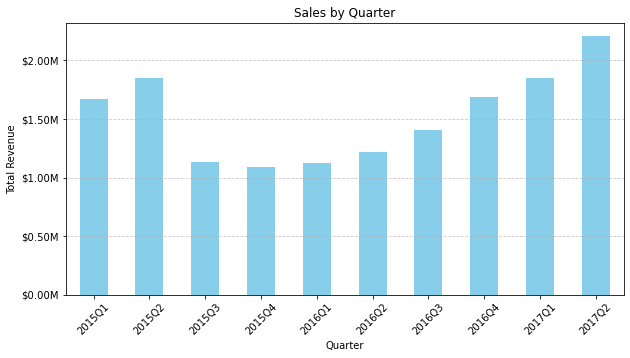

In [20]:
import matplotlib.ticker as mticker

# Plotting sales by quarter
plt.figure(figsize=(10, 5))
sales_by_quarter.plot(kind='bar', color='skyblue')
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define a formatter function to format tick labels as millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.2f}M'

# Convert y-axis tick labels to millions
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

In [21]:
# Convert 'OrderDate' column to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce', format='%m/%d/%Y')

# Drop rows with NaT (Not a Time) values if any
df.dropna(subset=['OrderDate'], inplace=True)

# Extract quarter and month
df['quarter'] = df['OrderDate'].dt.to_period('Q')
df['month'] = df['OrderDate'].dt.strftime('%b')

# Convert revenue values to strings with fixed decimal format
df['ProductPrice'] = df['ProductPrice'].apply(lambda x: '{:.2f}'.format(x))

# Display the updated DataFrame
print(df)

# Convert 'OrderDate' column to datetime in top_accounts_by_quarter
top_accounts_by_quarter['OrderDate'] = pd.to_datetime(top_accounts_by_quarter['OrderDate'], errors='coerce')

# Drop rows with NaT (Not a Time) values if any
top_accounts_by_quarter.dropna(subset=['OrderDate'], inplace=True)

# Extract quarter and month
top_accounts_by_quarter['quarter'] = top_accounts_by_quarter['OrderDate'].dt.to_period('Q')

# Group by quarter and sum sales
sales_by_quarter = df.groupby('quarter')['ProductPrice'].sum()

print(sales_by_quarter)


       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0     2015-01-01   9/21/2001     SO45080         332        14657   
1     2015-01-01   12/5/2001     SO45079         312        29255   
2     2015-01-01  10/29/2001     SO45082         350        11455   
3     2015-01-01  11/16/2001     SO45081         338        26782   
4     2015-01-02  12/15/2001     SO45083         312        14947   
...          ...         ...         ...         ...          ...   
56041 2017-06-30   3/22/2004     SO74143         477        28517   
56042 2017-06-30   3/15/2004     SO74143         479        28517   
56043 2017-06-30    4/8/2004     SO74143         606        28517   
56044 2017-06-30   5/15/2004     SO74124         480        21676   
56045 2017-06-30    5/4/2004     SO74124         538        21676   

       TerritoryKey  OrderLineItem  OrderQuantity  ProductSubcategoryKey  \
0                 1              1              1                      2   
1                 4

In [22]:
import matplotlib.pyplot as plt

# Function to plot pie chart for a given dataframe and title
def plot_pie_chart(dataframe, title):
    plt.figure(figsize=(8, 8))
    plt.pie(dataframe['ProductPrice'], labels=dataframe['ProductSKU'], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Function to generate pie charts for revenue by SKU for each quarter
def plot_pie_charts_by_quarter(df):
    quarters = df['quarter'].unique()
    for quarter in quarters:
        quarter_data = df[df['quarter'] == quarter]
        plot_pie_chart(quarter_data, f'Revenue by SKU - {quarter}')

# Function to generate pie chart for revenue by SKU for each month
def plot_pie_chart_by_month(df):
    months = df['month'].unique()
    for month in months:
        month_data = df[df['month'] == month]
        plot_pie_chart(month_data, f'Revenue by SKU - {month}')


In [24]:
# Function to categorize ProductSKUs
def categorize_productsku(ProductSKU):
    
    if 'BK' in ProductSKU:
        return 'Books'
    elif 'TI' in ProductSKU:
        return 'Technology'
    else:
        return 'Other'

# Add a new column for categorized ProductSKUs
df['ProductCategory'] = df['ProductSKU'].apply(categorize_productsku)
df.columns


Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity',
       'ProductSubcategoryKey', 'ProductSKU', 'ProductName', 'ModelName',
       'ProductDescription', 'ProductColor', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'SubcategoryName', 'ProductCategoryKey',
       'Region', 'Country', 'Continent', 'CategoryName', 'FirstName',
       'LastName', 'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress',
       'AnnualIncome', 'TotalChildren', 'EducationLevel', 'Occupation',
       'HomeOwner', 'quarter', 'month', 'ProductCategory'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt

# Function to generate pie charts for revenue by category for each quarter
def plot_pie_charts_by_quarter(df):
    quarters = df['quarter'].unique()
    for quarter in quarters:
        quarter_data = df[df['quarter'] == quarter]
        category_revenue = quarter_data.groupby('ProductCategory')['ProductPrice'].sum()
        if not category_revenue.empty:
            plot_pie_chart(category_revenue, f'Revenue by Category - {quarter}')
        else:
            print(f"No data for quarter {quarter}")

# Function to generate pie charts for revenue by category for each month
def plot_pie_chart_by_month(df):
    months = df['month'].unique()
    for month in months:
        month_data = df[df['month'] == month]
        category_revenue = month_data.groupby('ProductCategory')['ProductPrice'].sum()
        if not category_revenue.empty:
            plot_pie_chart(category_revenue, f'Revenue by Category - {month}')
        else:
            print(f"No data for month {month}")

# Impute missing values with the mean of the column
print(df['ProductPrice'].unique())


['699.10' '3578.27' '3374.99' '3399.99' '2181.56' '2071.42' '2049.10'
 '1000.44' '2443.35' '8.99' '539.99' '3.99' '159.00' '32.60' '28.99'
 '4.99' '742.35' '33.64' '1214.85' '34.99' '48.07' '21.49' '2384.07'
 '1700.99' '9.99' '35.00' '21.98' '53.99' '24.99' '8.64' '29.99' '769.49'
 '23.55' '2.29' '564.99' '54.99' '63.50' '7.95' '120.00' '69.99']


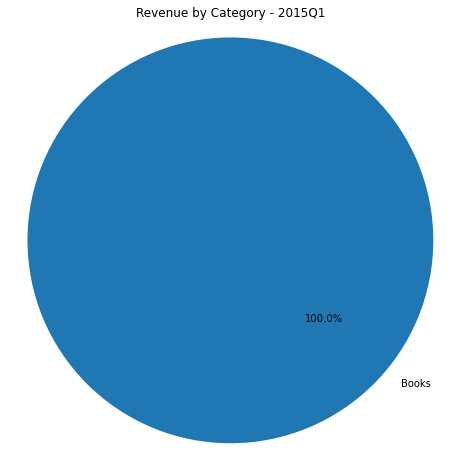

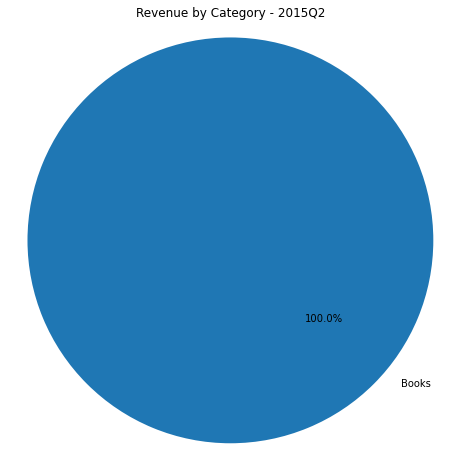

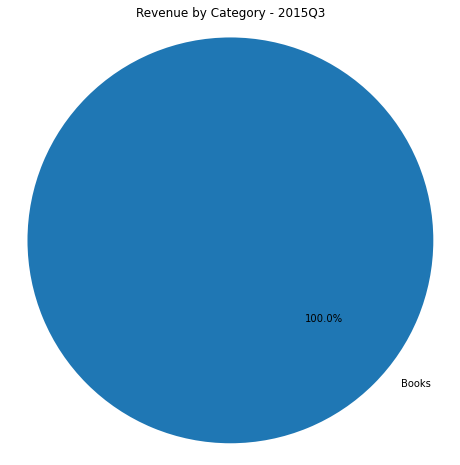

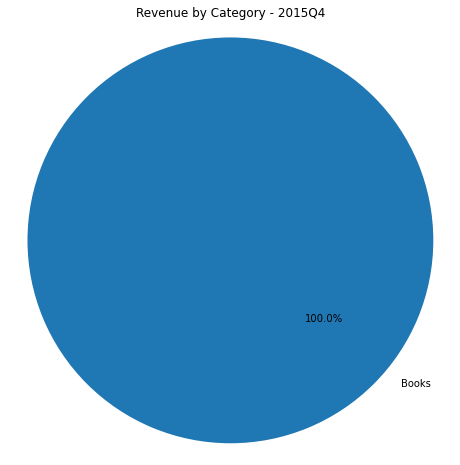

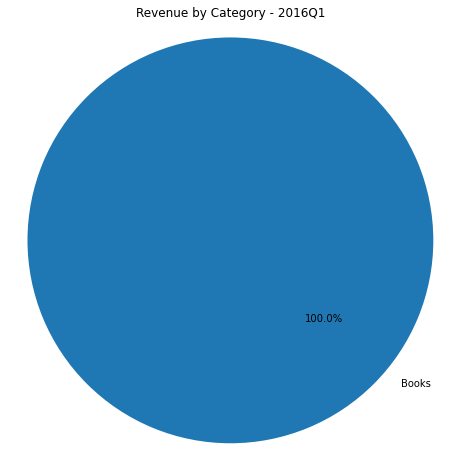

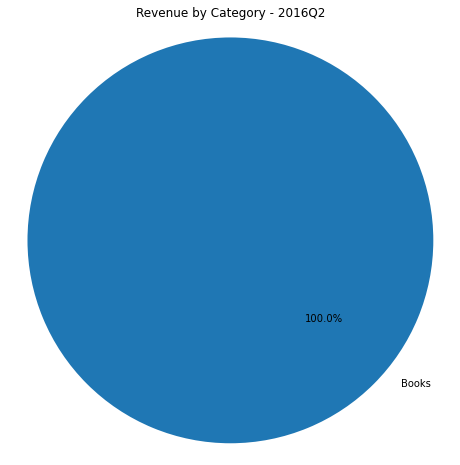

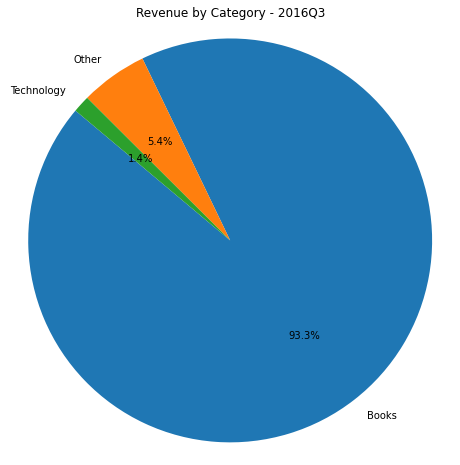

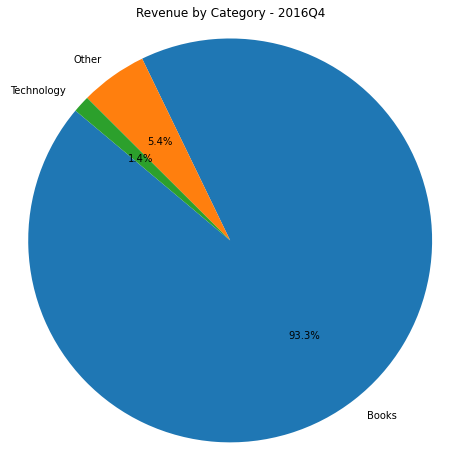

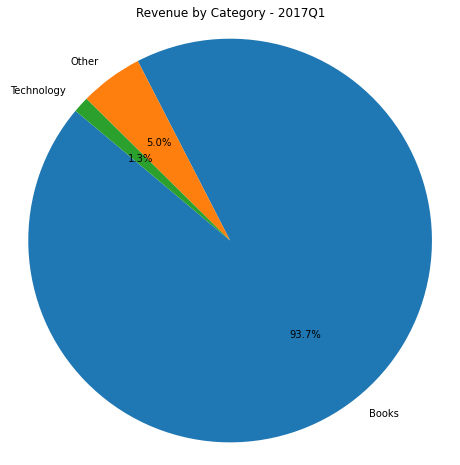

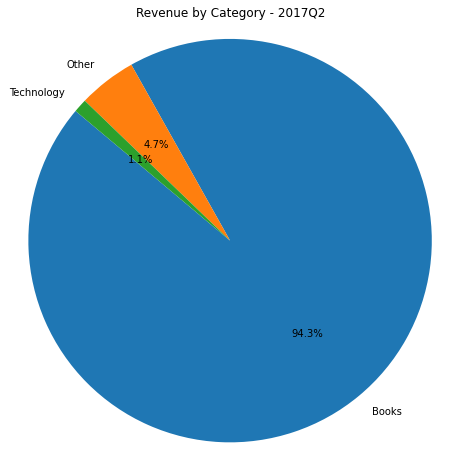

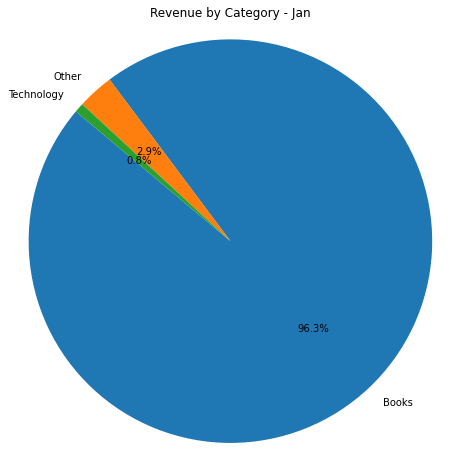

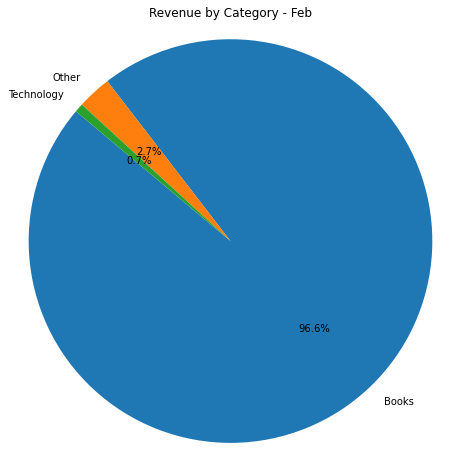

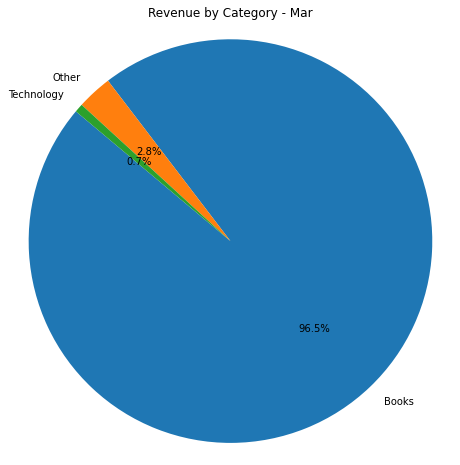

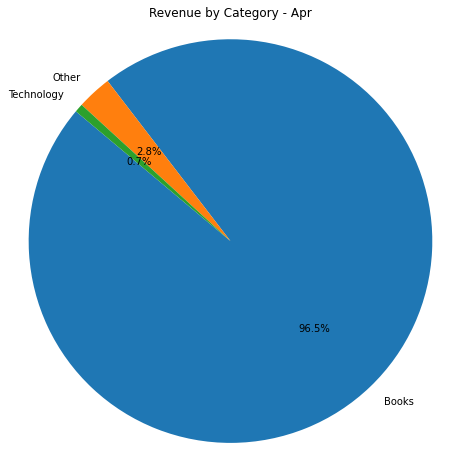

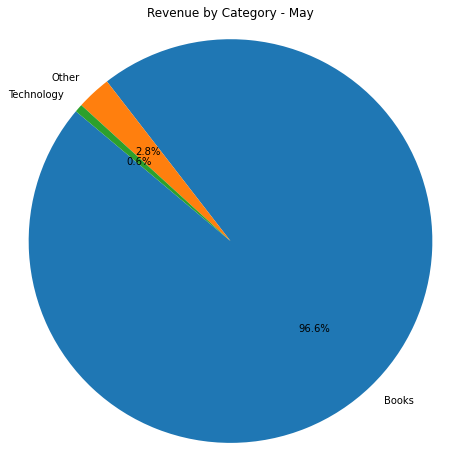

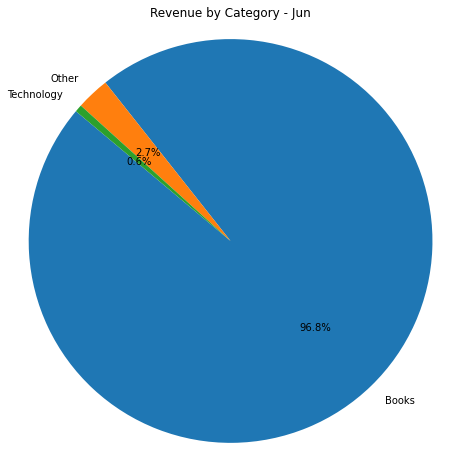

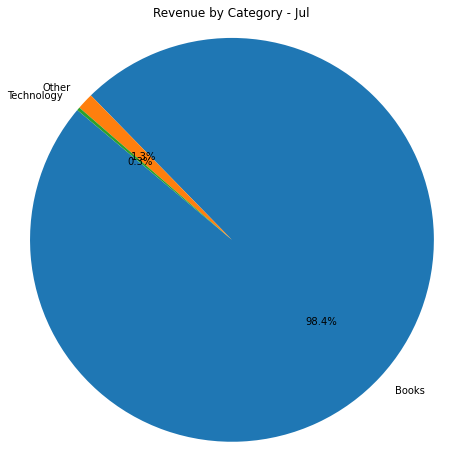

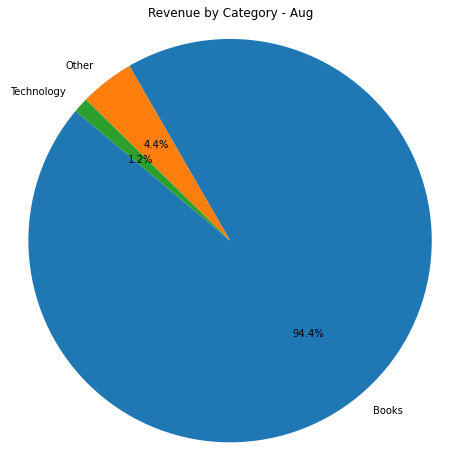

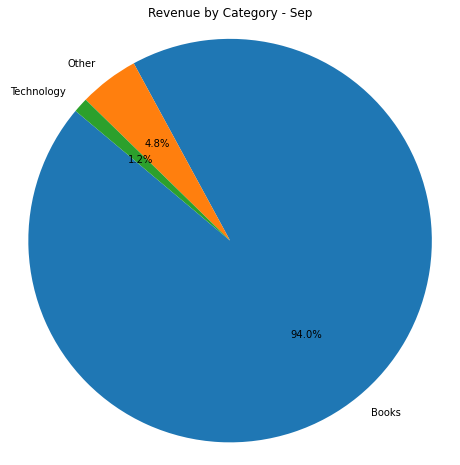

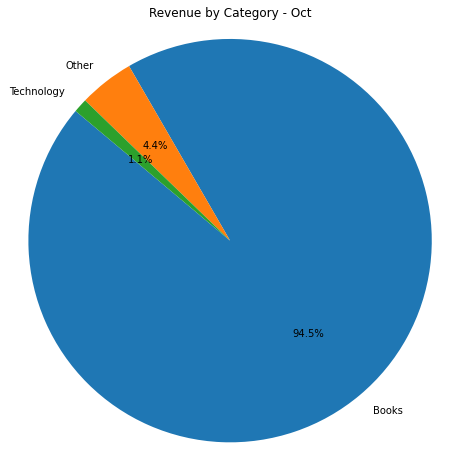

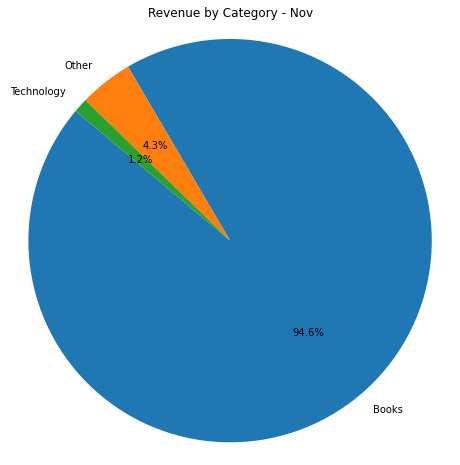

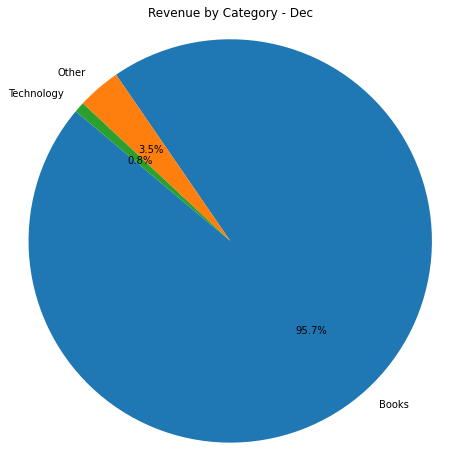

In [26]:
# Remove non-numeric values from 'ProductPrice' column
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce').fillna(0)

# Define the plot_pie_chart function
def plot_pie_chart(dataframe, title):
    plt.figure(figsize=(8, 8))
    plt.pie(dataframe, labels=dataframe.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Generate pie charts for revenue by category per quarter
plot_pie_charts_by_quarter(df)

# Generate pie charts for revenue by category per month
plot_pie_chart_by_month(df)

In [27]:
# Load data with additional representations of missing values
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1', na_values=['', 'Unknown', 'NA', 'NaN'])


In [28]:
df.isnull().sum()

OrderDate                    0
StockDate                    0
OrderNumber                  0
ProductKey                   0
CustomerKey                  0
TerritoryKey                 0
OrderLineItem                0
OrderQuantity                0
ProductSubcategoryKey        0
ProductSKU                   0
ProductName                  0
ModelName                    0
ProductDescription           0
ProductColor             26878
ProductSize                  0
ProductStyle                 0
ProductCost                  0
ProductPrice                 0
SubcategoryName              0
ProductCategoryKey           0
Region                       0
Country                      0
Continent                    0
CategoryName                 0
FirstName                   16
LastName                    16
BirthDate                   16
MaritalStatus               16
Gender                     396
EmailAddress                16
AnnualIncome                16
TotalChildren               16
Educatio

In [29]:
# Drop rows with missing values in the 'BirthDate' column
df.dropna(subset=['BirthDate'], inplace = True)
df.dropna(subset=['TotalChildren'], inplace = True)
df.dropna(subset=['EducationLevel'], inplace = True)
df.dropna(subset=['HomeOwner'], inplace = True)
df.dropna(subset=['Occupation'], inplace = True)
df.dropna(subset=['MaritalStatus'], inplace = True)
df.dropna(subset=['Gender'], inplace = True)


In [30]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print(missing_values)


OrderDate                    0
StockDate                    0
OrderNumber                  0
ProductKey                   0
CustomerKey                  0
TerritoryKey                 0
OrderLineItem                0
OrderQuantity                0
ProductSubcategoryKey        0
ProductSKU                   0
ProductName                  0
ModelName                    0
ProductDescription           0
ProductColor             26671
ProductSize                  0
ProductStyle                 0
ProductCost                  0
ProductPrice                 0
SubcategoryName              0
ProductCategoryKey           0
Region                       0
Country                      0
Continent                    0
CategoryName                 0
FirstName                    0
LastName                     0
BirthDate                    0
MaritalStatus                0
Gender                       0
EmailAddress                 0
AnnualIncome                 0
TotalChildren                0
Educatio

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Calculate age in years
today = pd.Timestamp.now()
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['Age'] = (today.year - df['BirthDate'].dt.year)

# Drop the 'BirthDate' column
df.drop(columns=['BirthDate'], inplace=True)

# Select features for segmentation
features = ['MaritalStatus', 'Gender', 'Age', 'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner']
data = df[features]

# Convert categorical variables to numerical
label_encoder = LabelEncoder()
for feature in ['MaritalStatus', 'Gender', 'EducationLevel', 'Occupation', 'HomeOwner']:
    data.loc[:, feature] = label_encoder.fit_transform(data.loc[:, feature])

# Normalize numerical features
scaler = StandardScaler()
data[['Age', 'TotalChildren']] = scaler.fit_transform(data[['Age', 'TotalChildren']])

# Choose number of clusters
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)


<ipython-input-31-aa0614d3a00f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Age', 'TotalChildren']] = scaler.fit_transform(data[['Age', 'TotalChildren']])
C:\Users\mark.hanson\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-31-aa0614d3a00f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

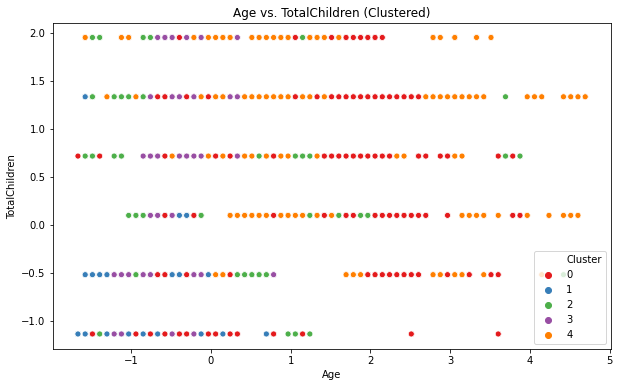

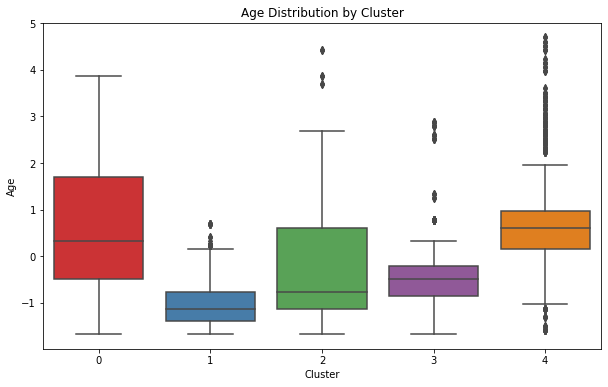

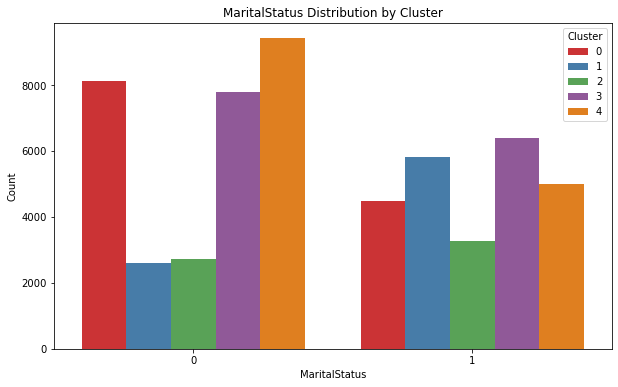

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Age vs. TotalChildren colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='TotalChildren', hue='Cluster', palette='Set1', legend='full')
plt.title('Age vs. TotalChildren (Clustered)')
plt.xlabel('Age')
plt.ylabel('TotalChildren')
plt.show()

# Box plot of Age by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Cluster', y='Age', palette='Set1')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Bar plot of MaritalStatus distribution by cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MaritalStatus', hue='Cluster', palette='Set1')
plt.title('MaritalStatus Distribution by Cluster')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


In [33]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [55]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
df = pd.read_csv('AdventureWorks.csv', encoding='latin-1')

# Prepare the data for market basket analysis
# We'll use 'ProductName' as our item identifier
# Group by 'OrderNumber' to create transactions
transactions = df.groupby('OrderNumber')['ProductName'].apply(list)

# Transform the dataset into a format suitable for market basket analysis
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort the rules by lift
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# Display the top 10 rules
print(rules.head(10))


                                       antecedents  \
60                                  (Touring Tire)   
61                             (Touring Tire Tube)   
64  (Fender Set - Mountain, Water Bottle - 30 oz.)   
65                          (Mountain Bottle Cage)   
13                                  (HL Road Tire)   
12                                (Road Tire Tube)   
30                                (Road Tire Tube)   
31                                  (ML Road Tire)   
8                               (HL Mountain Tire)   
9                             (Mountain Tire Tube)   

                                       consequents  antecedent support  \
60                             (Touring Tire Tube)            0.034295   
61                                  (Touring Tire)            0.054204   
64                          (Mountain Bottle Cage)            0.011763   
65  (Fender Set - Mountain, Water Bottle - 30 oz.)            0.075346   
13                                (

In [56]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [57]:
myretaildata = pd.read_csv('AdventureWorks.csv', encoding = 'latin-1')
myretaildata.head()


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,2,BK-R50B-58,...,THOMAS,11/11/1958,M,M,john48@adventure-works.com,80000.0,1.0,Partial College,Skilled Manual,N
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,2,BK-R93R-48,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,80000.0,3.0,Partial College,Professional,N
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,1,BK-M82B-44,...,SANZ,4/21/1974,M,M,ross38@adventure-works.com,100000.0,0.0,High School,Management,Y
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,2,BK-R50B-44,...,LEWIS,9/25/1980,S,M,seth20@adventure-works.com,30000.0,0.0,High School,Skilled Manual,N
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,2,BK-R93R-48,...,CHEN,1/11/1965,S,M,alejandro4@adventure-works.com,20000.0,2.0,High School,Manual,Y


## Data preparation

In [58]:
myretaildata['ProductName'] = myretaildata['ProductName'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis = 0, subset = ['OrderNumber'], inplace = True) #removes duplicate Order Number
myretaildata['OrderNumber'] = myretaildata['OrderNumber'].astype('str') #converting order number to string
myretaildata = myretaildata[~myretaildata['OrderNumber'].str.contains('C')]  #any prefix not starting with S is a credit
myretaildata.head()


,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ProductSubcategoryKey,ProductSKU,...,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,2,BK-R50B-58,...,THOMAS,11/11/1958,M,M,john48@adventure-works.com,80000.0,1.0,Partial College,Skilled Manual,N
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,2,BK-R93R-48,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,80000.0,3.0,Partial College,Professional,N
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,1,BK-M82B-44,...,SANZ,4/21/1974,M,M,ross38@adventure-works.com,100000.0,0.0,High School,Management,Y
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,2,BK-R50B-44,...,LEWIS,9/25/1980,S,M,seth20@adventure-works.com,30000.0,0.0,High School,Skilled Manual,N
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,2,BK-R93R-48,...,CHEN,1/11/1965,S,M,alejandro4@adventure-works.com,20000.0,2.0,High School,Manual,Y


In [59]:
myretaildata['Country'].value_counts()


Country
United States     19811
Australia         12409
Canada             6875
United Kingdom     6423
Germany            5289
France             5239
Name: count, dtype: int64

In [60]:
myretaildata.shape


(56046, 35)

In [61]:
mybasket = (myretaildata[myretaildata['Country'] == 'Canada']
            .groupby(['OrderNumber', 'ProductName'])['OrderQuantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('OrderNumber'))


mybasket.head(100)


ProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 58","Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
OrderNumber,,,,,,,,,,,,,,,,,,,,,
SO45081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO46220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)


In [63]:
## Training Model

#generate frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support = 0.07, use_colnames = True)


# generating rules
my_rules = association_rules(my_frequent_itemsets, metric = "lift", min_threshold = 1)


my_rules.head(100)


C:\Users\mark.hanson\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.108135,0.181878,0.091601,0.847095,4.657481,0.071933,5.350516,0.880505
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.181878,0.108135,0.091601,0.503636,4.657481,0.071933,1.796798,0.959871


In [64]:
my_basket_sets['Road-650 Black, 44'].sum()

7

In [65]:
my_basket_sets['Road-150 Red, 62'].sum()

21

In [66]:
#filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.108135,0.181878,0.091601,0.847095,4.657481,0.071933,5.350516,0.880505
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.181878,0.108135,0.091601,0.503636,4.657481,0.071933,1.796798,0.959871


In [67]:
mybasket = (myretaildata[myretaildata['Country'] == 'United Kingdom']
            .groupby(['OrderNumber', 'ProductName'])['OrderQuantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('OrderNumber'))


mybasket.head(100)

ProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
OrderNumber,,,,,,,,,,,,,,,,,,,,,
SO45083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO46905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)

In [69]:
## Training Model

#generate frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support = 0.07, use_colnames = True)


# generating rules
my_rules = association_rules(my_frequent_itemsets, metric = "lift", min_threshold = 1)


my_rules.head(100)

C:\Users\mark.hanson\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.078311,0.166005,0.074341,0.949309,5.718553,0.061341,16.452446,0.895238
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.166005,0.078311,0.074341,0.447826,5.718553,0.061341,1.669200,0.989371


In [70]:
my_basket_sets['Road-650 Black, 44'].sum()

7

In [71]:
my_basket_sets['Road-150 Red, 62'].sum()

13

In [72]:
#filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.078311,0.166005,0.074341,0.949309,5.718553,0.061341,16.452446,0.895238
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.166005,0.078311,0.074341,0.447826,5.718553,0.061341,1.669200,0.989371


In [102]:
mybasket = (myretaildata[myretaildata['Country'] == 'France']
            .groupby(['OrderNumber', 'ProductName'])['OrderQuantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('OrderNumber'))


mybasket.head(100)


ProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
OrderNumber,,,,,,,,,,,,,,,,,,,,,
SO45096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO46846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)


In [104]:
## Training Model

#generate frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support = 0.06, use_colnames = True)


# generating rules
my_rules = association_rules(my_frequent_itemsets, metric = "lift", min_threshold = 1)


my_rules.head(100)


C:\Users\mark.hanson\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.074298,0.142549,0.066955,0.901163,6.321794,0.056364,8.675391,0.909382
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.142549,0.074298,0.066955,0.469697,6.321794,0.056364,1.745609,0.981766


In [105]:
my_basket_sets['Road-650 Black, 44'].sum()

6

In [106]:
my_basket_sets['Road-150 Red, 62'].sum()

9

In [107]:
#filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.074298,0.142549,0.066955,0.901163,6.321794,0.056364,8.675391,0.909382
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.142549,0.074298,0.066955,0.469697,6.321794,0.056364,1.745609,0.981766


In [108]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [109]:
myretaildata['Occupation'].value_counts()


Occupation
Professional      17750
Skilled Manual    13137
Management         9791
Clerical           8845
Manual             6507
Name: count, dtype: int64

In [110]:
myretaildata.shape


(56046, 35)

In [133]:
mybasket = (myretaildata[myretaildata['Occupation'] == 'Manual']
            .groupby(['OrderNumber', 'ProductName'])['OrderQuantity']
            .sum().unstack().reset_index().fillna(0)
            .set_index('OrderNumber'))


mybasket.head(100)


ProductName,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,HL Mountain Tire,HL Road Tire,"Half-Finger Gloves, L",...,"Touring-3000 Blue, 62","Touring-3000 Yellow, 44","Touring-3000 Yellow, 50","Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S"
OrderNumber,,,,,,,,,,,,,,,,,,,,,
SO45083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO45126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SO46548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SO46570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
#converting all positive values to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)


In [135]:
## Training Model

#generate frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support = 0.04, use_colnames = True)


# generating rules
my_rules = association_rules(my_frequent_itemsets, metric = "lift", min_threshold = 1)


my_rules.head(100)


C:\Users\mark.hanson\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.069553,0.141834,0.064780,0.931373,6.566624,0.054915,12.504700,0.911084
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.141834,0.069553,0.064780,0.456731,6.566624,0.054915,1.712681,0.987822
2,(Touring Tire),(Touring Tire Tube),0.060689,0.102625,0.051483,0.848315,8.266135,0.045255,5.916026,0.935818
3,(Touring Tire Tube),(Touring Tire),0.102625,0.060689,0.051483,0.501661,8.266135,0.045255,1.884885,0.979551


In [136]:
#filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Road Bottle Cage),(Water Bottle - 30 oz.),0.069553,0.141834,0.064780,0.931373,6.566624,0.054915,12.504700,0.911084
1,(Water Bottle - 30 oz.),(Road Bottle Cage),0.141834,0.069553,0.064780,0.456731,6.566624,0.054915,1.712681,0.987822
2,(Touring Tire),(Touring Tire Tube),0.060689,0.102625,0.051483,0.848315,8.266135,0.045255,5.916026,0.935818
3,(Touring Tire Tube),(Touring Tire),0.102625,0.060689,0.051483,0.501661,8.266135,0.045255,1.884885,0.979551
